# 🧬 Analyze scFoundation Embeddings

In this notebook, we load and explore the scFoundation bulk embeddings to understand their structure, distribution, and variation before applying dimensionality reduction (PCA).


In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## 📥 Load and Inspect Embeddings

Let's load the `.npy` file containing scFoundation embeddings and look at its basic properties.


In [12]:
# Load dataset
df = pd.read_csv("../../data/processed/pancancer_pseudobulk_30_pcs_tissue.csv")

# Keep only one entry per cell line
df_unique = df.drop_duplicates(subset="SANGER_MODEL_ID")


## 📊 Basic Embedding Statistics

Let's check the distribution of embedding norms and per-dimension statistics.


In [13]:
# Select scFoundation PCA columns
feature_cols = [col for col in df_unique.columns if col.startswith("SC_PC")]
X = df_unique[feature_cols].values


In [14]:
# Reconstruct tissue labels from one-hot encoded columns
tissue_cols = [col for col in df_unique.columns if col.startswith("Tissue_")]
df_unique["Tissue"] = df_unique[tissue_cols].idxmax(axis=1).str.replace("Tissue_", "")


## 🌀 Optional: Visualize Embeddings with t-SNE

We'll use t-SNE to visualize global structure in 2D.


In [15]:
# Standardize features before t-SNE
X_scaled = StandardScaler().fit_transform(X)


In [16]:
# Run t-SNE on PCA features
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


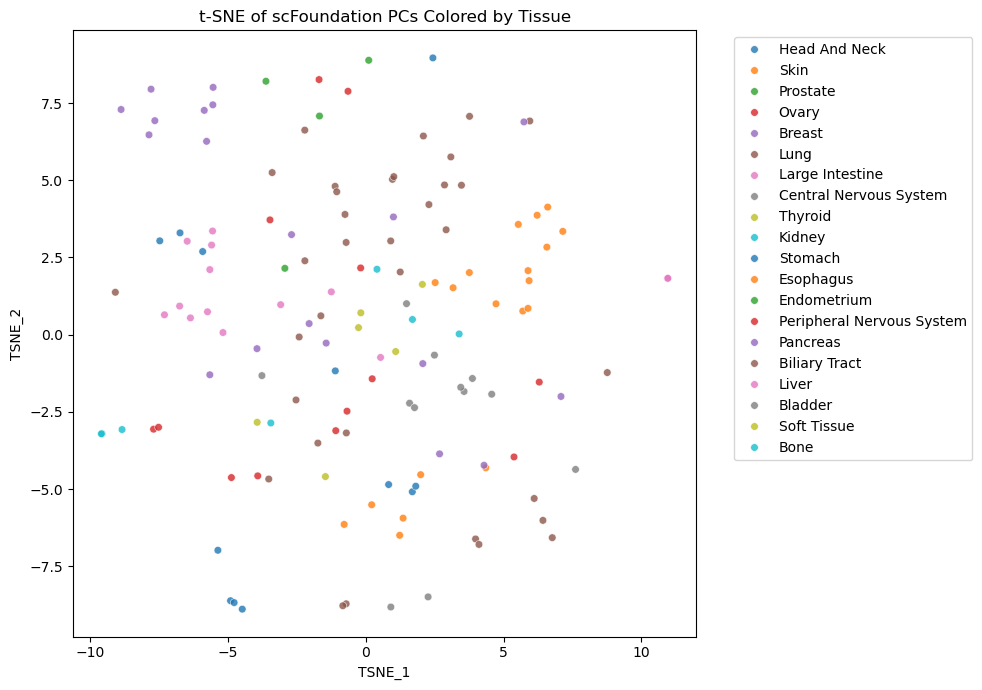

In [17]:
# Prepare DataFrame for plotting
df_plot = pd.DataFrame(X_tsne, columns=["TSNE_1", "TSNE_2"])
df_plot["Tissue"] = df_unique["Tissue"].values

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_plot, x="TSNE_1", y="TSNE_2", hue="Tissue", s=30, alpha=0.8, palette="tab10")
plt.title("t-SNE of scFoundation PCs Colored by Tissue")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Define feature columns (your PCA features)
feature_cols = [col for col in df_unique.columns if col.startswith("SC_PC")]

# Apply t-SNE
X = df_unique[feature_cols].values
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(X_scaled)

# Save back to the DataFrame
df_unique["TSNE_1"] = tsne_result[:, 0]
df_unique["TSNE_2"] = tsne_result[:, 1]


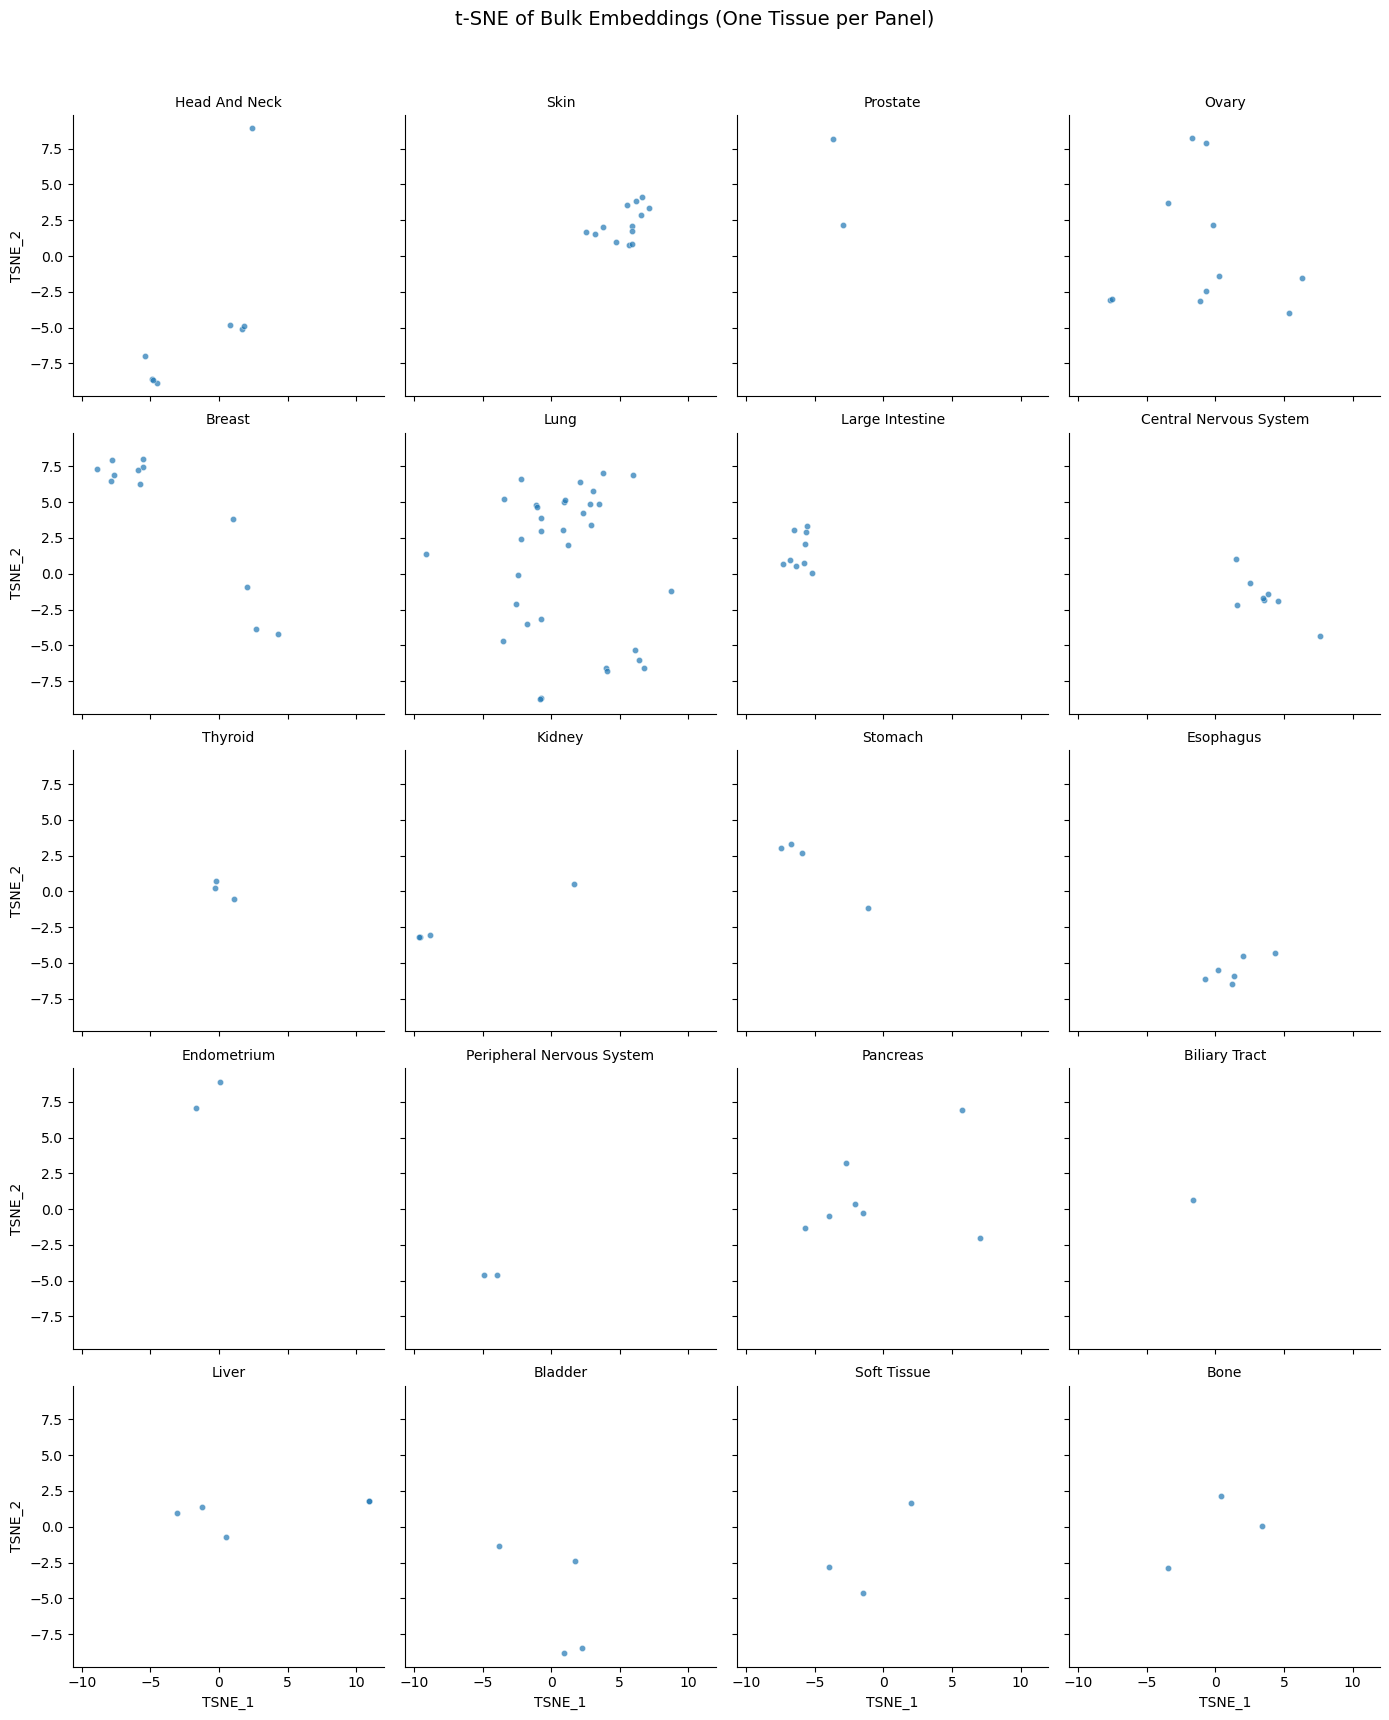

In [20]:
# Plot one tissue per panel (t-SNE faceted view)
g = sns.FacetGrid(df_unique, col="Tissue", col_wrap=4, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="TSNE_1", y="TSNE_2", s=20, alpha=0.7)
g.set_titles(col_template="{col_name}", size=10)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("t-SNE of Bulk Embeddings (One Tissue per Panel)", fontsize=14)
plt.show()


In [21]:
# Count per tissue
cell_lines_per_tissue = df_unique.groupby("Tissue")["SANGER_MODEL_ID"].nunique().sort_values(ascending=False)

# Total count
total_cell_lines = df_unique["SANGER_MODEL_ID"].nunique()

# Display
print("📊 Number of unique cell lines per tissue:")
print(cell_lines_per_tissue)
print(f"\n🔢 Total unique cell lines: {total_cell_lines}")


📊 Number of unique cell lines per tissue:
Tissue
Lung                         33
Skin                         13
Breast                       12
Ovary                        11
Large Intestine               9
Central Nervous System        8
Head And Neck                 8
Pancreas                      7
Esophagus                     6
Liver                         5
Bladder                       4
Kidney                        4
Stomach                       4
Bone                          3
Thyroid                       3
Soft Tissue                   3
Prostate                      2
Endometrium                   2
Peripheral Nervous System     2
Biliary Tract                 1
Name: SANGER_MODEL_ID, dtype: int64

🔢 Total unique cell lines: 140
